In [4]:
# ===================================================================
# 1. 匯入必要的類別與函式
# ===================================================================
from aclg.dataclass.component import Component
from aclg.rules.split_basic import split_vertical, split_horizontal
from aclg.rules.symetric.split_symmetric_1 import split_symmetric_1_horizontal, split_symmetric_1_vertical

root_component = Component(x=0, y=0, width=100, height=80)

print("\n--- 測試開始 ---")
print(f"初始元件: {root_component}")

new_components = split_symmetric_1_vertical(root_component)

for comp in new_components:
    print(f"新元件: {comp}")



--- 測試開始 ---
初始元件: Component(x=0, y=0, width=100, height=80, level=0, relation_id=0, generate_rule='', sub_components=None)
新元件: Component(x=-25.0, y=0, width=50.0, height=80, level=1, relation_id=0, generate_rule='split_symmetric_1', sub_components=None)
新元件: Component(x=25.0, y=0, width=50.0, height=80, level=1, relation_id=0, generate_rule='split_symmetric_1', sub_components=None)


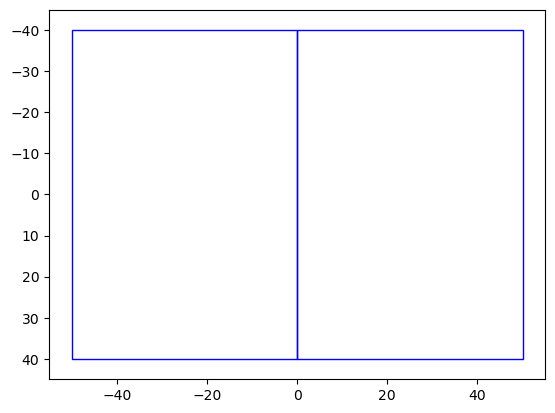

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 建立一個新的圖形和子圖
fig, ax = plt.subplots(1)


# 設定坐標軸的範圍，使其能容納所有的元件
min_x = min(comp.get_topleft()[0] for comp in new_components) if new_components else 0
min_y = min(comp.get_topleft()[1] for comp in new_components) if new_components else 0
max_x = max(comp.get_bottomright()[0] for comp in new_components) if new_components else 100
max_y = max(comp.get_bottomright()[1] for comp in new_components) if new_components else 80
ax.set_xlim(min_x - 5, max_x + 5)
ax.set_ylim(min_y - 5, max_y + 5)
ax.invert_yaxis() # 使 y 軸方向與佈局習慣一致 (上為 0)

# 遍歷每一個元件，並繪製矩形
for component in new_components:
    x, y = component.get_topleft()
    width = component.width
    height = component.height
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    # 在矩形中心標示元件名稱 (可選)
    center_x = x + width / 2
    center_y = y + height / 2

# 顯示圖形
plt.show()